(-3.1, 3.1)

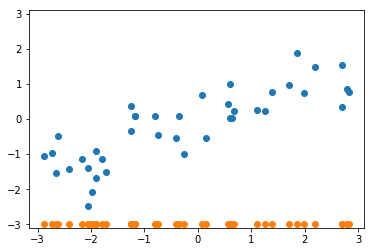

In [31]:
import mglearn
import numpy  as np
import matplotlib.pyplot as plt
import mglearn.plots
#The plot below is showing the single feature on the x-axis, with the data points as
#green dots. For each data point, the target output is plotted in blue on the y-axis.

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-3.1, 3.1) #setting y limit 

In [32]:
#breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()
print(cancer.data.shape,cancer.target.shape)
print(cancer.target_names)
np.bincount(cancer.target) #Count number of occurrences of each value in array of non-negative ints using bincount
cancer.feature_names

(569, 30) (569,)
['malignant' 'benign']


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
#boston dataset
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


In [33]:
# k nearest using sklearn
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

C:\Users\vasun\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


0.8571428571428571

AttributeError: module 'mglearn' has no attribute 'cm2'

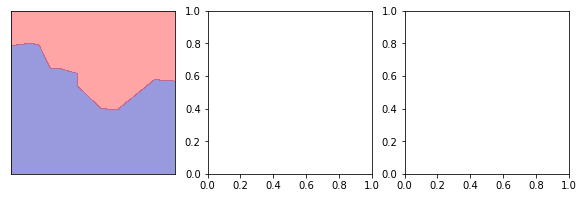

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%d neighbor(s)" % n_neighbors)


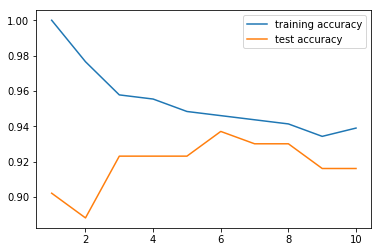

In [30]:
# KNN on breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
 # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()
